In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def kalman( x, P, m, R, motion, Q, F, H ):
        '''
        Parameters:
        x: initial state
        P: initial uncertainty convariance matrix
        measurement: observed position ( same shape as H * x )
        R: measurement noise ( same shape as H )
        motion: external motion added to state vector x
        Q: motion noise ( same shape as P )
        F: next state function: x_prime = F * x
        H: measurement function: position = H * x

        Return: the updated and predicted new values for ( x, P )

        See also http://en.wikipedia.org/wiki/Kalman_filter

        This version of kalman can be applied to many different situations by
        appropriately defining F and H 
        '''

#---- UPDATE x, P based on measurement m    
#            distance between measured and current position-belief

        y = m - H * x

        S = H * P * H.T + R  # residual convariance
        K = P * H.T * S.I    # Kalman gain

        x = x + K * y
        I = np.matrix( np.eye( F.shape[0] ) ) # identity matrix
        P = ( I - K * H ) * P

#---- PREDICT x, P based on motion

        x = F * x + motion
        P = F * P * F.T + Q

#---- Exit

        return x, P

In [3]:


#pb1

#read

data1=np.loadtxt('pb1.csv',delimiter=',')

In [4]:
sz=len(data1)
print(sz)

128


In [5]:

N = sz
x = np.matrix( '0. 0. 0. 0.' ).T 
P = np.matrix( np.eye( 4 ) ) *10e3
R = 0.01**2
F = np.matrix( '''
            1. 0. 1. 0.;
            0. 1. 0. 1.;
            0. 0. 1. 0.;
            0. 0. 0. 1.
            ''' )
H = np.matrix( '''
            1. 0. 0. 0.;
            0. 1. 0. 0.''' )
motion = np.matrix( '0. 0. 0. 0.' ).T

Q = np.matrix( np.eye( 4 ) )

m = np.matrix( '0. 0.' ).T
kalman_y = np.zeros(sz )
kalman_x = np.zeros( sz )
observed_x=range(sz)
for n in range( sz  ):
        m[0] = n
        m[1] = data1[n]
        x, P = kalman( x, P, m, R, motion, Q, F, H )
        kalman_x[n] = x[0]
        kalman_y[n] = x[1]

In [6]:
v_mess=np.gradient(data1)
v_filtr=np.gradient(kalman_y,kalman_x)

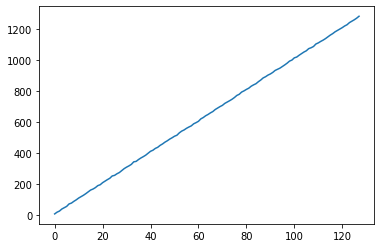

In [7]:
plt.plot(data1)


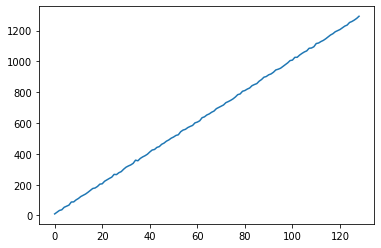

In [8]:
plt.plot(kalman_x,kalman_y)

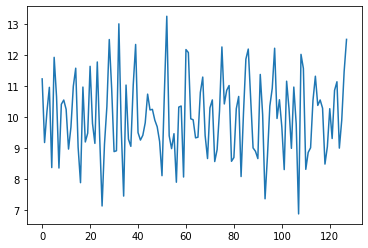

In [9]:
plt.plot(v_mess)

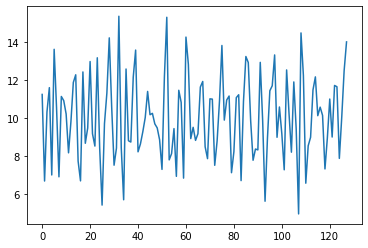

In [10]:
plt.plot(v_filtr)